# Fourier Transform

> My dad's favourite function (he is an engineer)

In [1]:
from typing import Tuple

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from custom_utils import *

In [2]:
def format_plot(ax, t = None, center_ex = False):
    # format axis to the middle
    
    for pos in ['left', 'bottom']:
        if center_ex:
            ax.spines[pos].set_position('zero')
        ax.spines[pos].set_color('black')
        ax.spines[pos].set_linewidth(0.5)
        # send the spine to the back
        ax.spines[pos].set_zorder(0)

    for pos in ['right', 'top']:
        ax.spines[pos].set_color('none')

    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=6)
    if t is not None:
        ax.set_xlim(t.min(), t.max())
    ax.legend(loc=1, fontsize=8)
    ax.grid(color='gray', linestyle='dashed', linewidth=0.5)

## Interjection!

Let's study the Fourier Transform with everyone's favourite [3Blue1Brown](https://www.youtube.com/watch?v=spUNpyF58BY)

> I so regret not working harder on my math when I was younger ...

Additional resources:
- [Continuous-Time Vs Discrete-Time Sinusoidal Signal](https://www.tutorialspoint.com/continuous-time-vs-discrete-time-sinusoidal-signal#:~:text=A%20sinusoidal%20signal%20which%20is,the%20amplitude%20of%20the%20signal.)

**The Continuous-Time Sinusoidal Signal**

- Basically, any periodic signal can be expressed in this form to make analysis easier.

$x(t)=A sin(\omega t + \phi) = A sin(2\pi f t + \phi)$

|||
|-|-|
|$A$|Amplitude of the signal.|
|$\omega$|$2\pi f = \frac{2\pi}{T}$ angular frequency in radians per second, $T$ is the period.|
|$f$|Frequency in Hz (cycles per second).|
|$\phi$|Phase angle in radians / How far the function is shifted horizontally from the usual position (remember this is a sin function).|

In [3]:
def get_signal(t: np.array, f: int, A: float=1, p: float = 0):
    return A * np.sin(2 * np.pi * f * t + p)

We treat $\theta == t$, $t$ is time - notice how when we set $f = 1$, the period $T=1$. 

For $sin(\theta)$, the period is $T=2\pi$, which translates to $f=\frac{1}{2\pi}$.

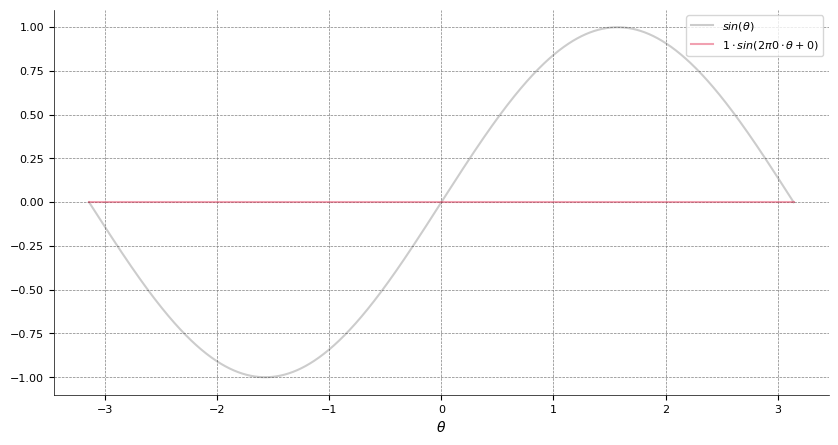

In [4]:
t = np.linspace(-np.pi, np.pi, 1000)
y_sin = np.sin(t)

# sinusoidal function
A = 1
f = 0 #1/(2*np.pi)
phi = 0
y_sinusoid = get_signal(t, f, A, phi)

_, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(t, y_sin, color='black', alpha=0.2, label='$sin(\\theta)$')


ax.plot(t, y_sinusoid, color='crimson', alpha=0.4, label=f"${{{A}}} \\cdot sin(2 \\pi {{{f}}} \\cdot \\theta + {{{phi}}})$")
ax.set_xlabel('$\\theta$')
format_plot(ax)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


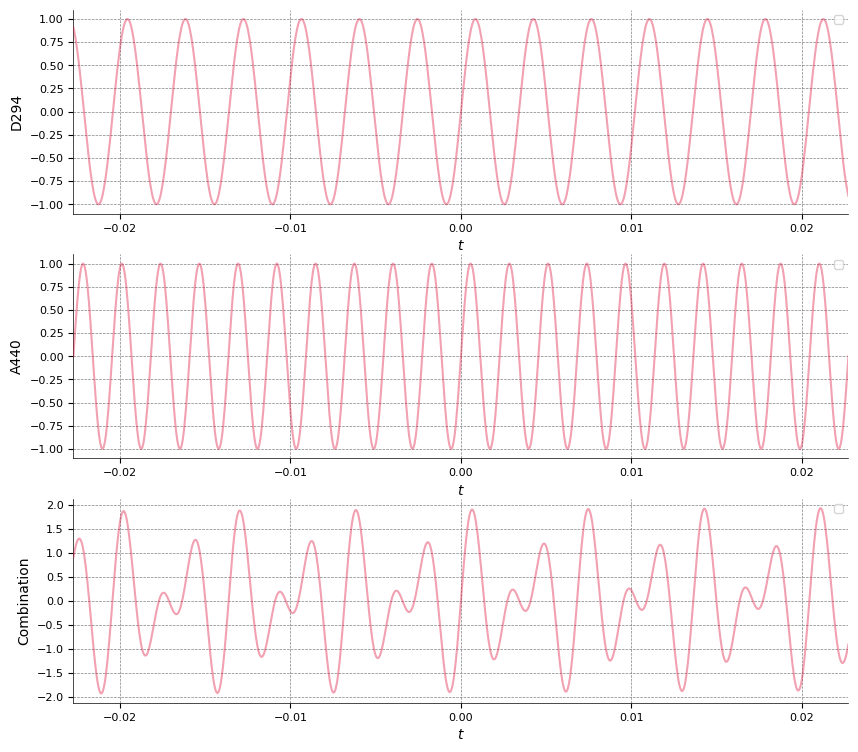

In [5]:
domain = 1/440*10 # np.pi
t = np.linspace(-domain, domain, 1000)

D294 = get_signal(t, 294, 1, 0)
A440 = get_signal(t, 440, 1, 0)
Pressure = D294 + A440
y_ = [D294, A440, Pressure]
titles = ['D294', 'A440', 'Combination']

_, ax = plt.subplots(len(y_), 1, figsize=(10, 3*len(y_)))
for i, y in enumerate(y_):
    ax[i].plot(t, y, color='crimson', alpha=0.4)
    ax[i].set_xlabel('$t$')
    ax[i].set_ylabel(titles[i])
    format_plot(ax[i], t)
    
plt.show()
# ax.plot(t, y_sin, color='black', alpha=0.2, label='$sin(\\theta)$')


# ax.plot(t, y_sinusoid, color='crimson', alpha=0.4, label=f"${{{A}}} \\cdot sin(2 \\pi {{{f}}} \\cdot \\theta + {{{phi}}})$")
# ax.set_xlabel('$\\theta$')
# format_plot(ax)
# plt.show()

Ok I understood fourier transform now, and will explore the formalism later from [here](https://www.3blue1brown.com/lessons/fourier-transforms).

For now, on to the tutorial!

## Fourier Transform in Numpy

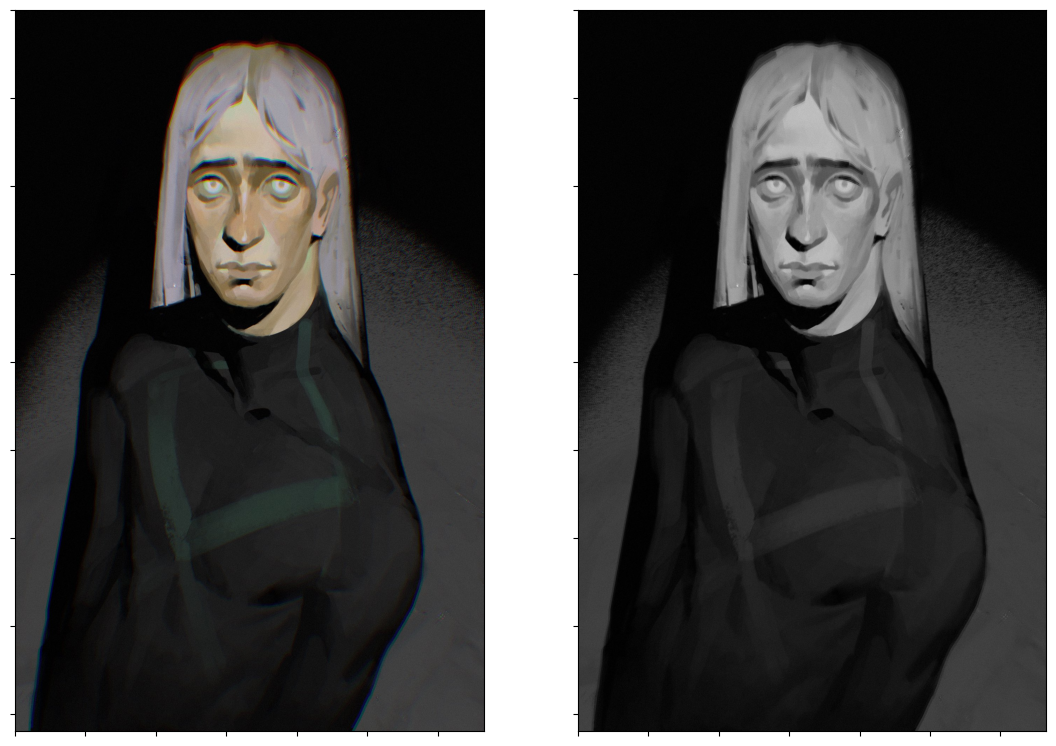

In [8]:
height, width, img, img_rgb, img_gray = load_image_and_show('../data/ptitsatart2.jpeg', scale=.5)

/tmp/ipykernel_33590/190740502.py:3: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))


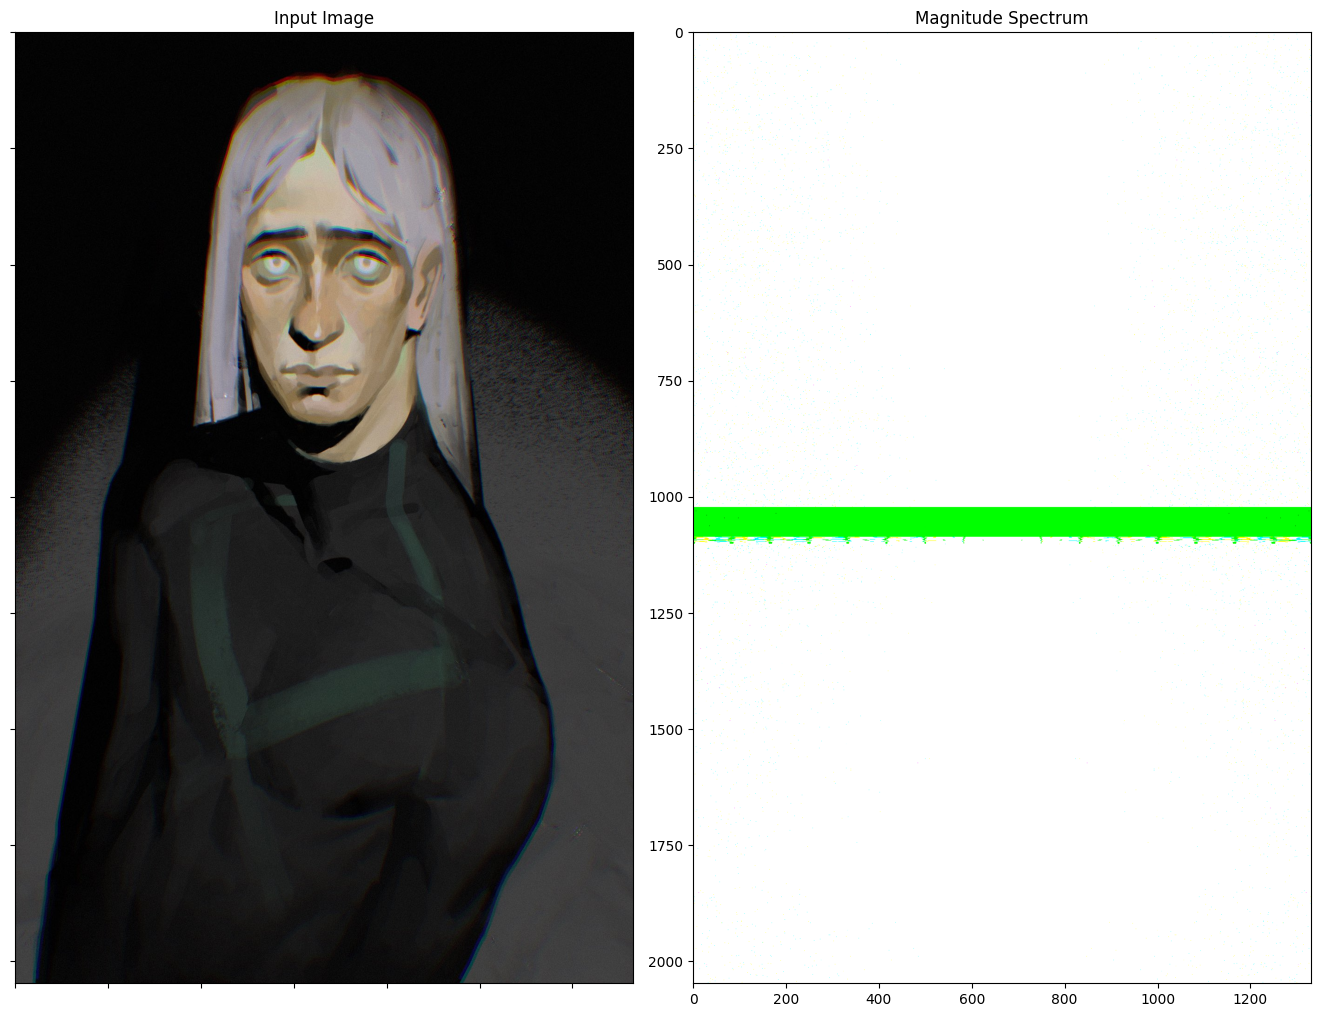

In [18]:
f = np.fft.fft2(img_rgb)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

_, ax = plt.subplots(1, 2, figsize=(width*0.5*2/100, height*0.5/100))
show_image(img_rgb, ax=ax[0], title='Input Image')
show_image(magnitude_spectrum, ax=ax[1], title='Magnitude Spectrum', show_ticks=True)
plt.tight_layout()
plt.show()

After going through the tutorial, I realize I did not understand what the heck is going on. So I will KIV his for when I have time
to deep dive into the math of the fourier transform:

Some sources that might be helpful:
- [What does frequency domain denote in case of images?](https://dsp.stackexchange.com/questions/1637/what-does-frequency-domain-denote-in-case-of-images)
